In [27]:
from data import get_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [28]:
# Step 1: Get data of french stock index
df = get_data('^FCHI', period="1y")

The size of  ^FCHI is  (256, 7)


In [36]:
def parkinson(data: pd.DataFrame) -> pd.DataFrame: 
        """
        Calculates the parkinson volatility estimator.
        :return: parkinson volatility estimator
        """
        const = 4 * np.log(2)

        rs = (np.log(data["high"] / data["low"]) ** 2.0).rolling(window=30).sum()

        result = (rs / (const * 252)) ** 0.5
        
        result = result*1000
        
        return result

In [37]:
vol = parkinson(df)

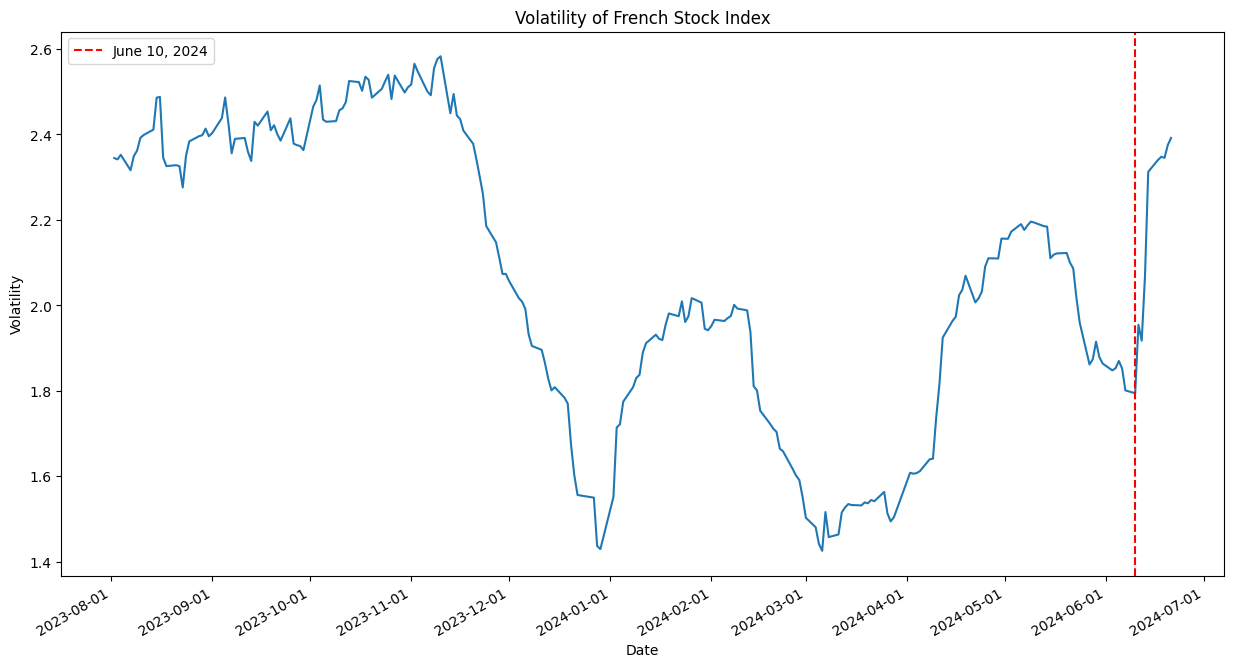

In [34]:
# Step X: Plot volatility
fig = plt.figure(figsize=(15, 8)) # Set graph size
plt.plot(vol) # Plot volatility
plt.title("Volatility of French Stock Index") # Title the graph
plt.xlabel("Date") # X-axis label
plt.ylabel('Volatility') # Y-axis label

# Step X: Plot vertical line of election announcement
target_date = pd.to_datetime('2024-06-10') # Convert the date to a datetime object
plt.axvline(x=target_date, color='r', linestyle='--', label='June 10, 2024') # Add the vertical line
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) # Format the date on the x-axis (optional, but helpful for readability)
plt.gcf().autofmt_xdate() # Rotate and align the tick labels so they look better
plt.legend() # Add a legend

plt.show() # Show graph